# Trabajo de Fin de Grado

## Predicción de eventos cardiovasculares y hemorrágicos en pacientes con doble antiagregación con modelos machine learning.

##### Pablo Pérez Sánchez
---
# 2. Model

In [1]:
# Import librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Algortimos / graficos
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport, DiscriminationThreshold, ROCAUC, ConfusionMatrix, PrecisionRecallCurve

%pylab inline

c:\users\pablo\anaconda3\envs\tfg\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Populating the interactive namespace from numpy and matplotlib


In [3]:
# Import data

df = pd.read_csv('../../data/PACS_DAPT_preprocess.csv')
df = df.drop('Unnamed: 0', axis=1)

In [4]:
# Variables predictoras de nuestro Dataset, aquellas variables que no tienen valores vacios (falta IMC por eso)
var_pred = ['Age', 'Sex', 'Diabetes', 'Hypertension', 'Dyslipemia', 'PeripheralArteryDisease',
            'PriorMyocardialInfarction', 'PriorPCI', 'PriorCABG', 'PriorStroke', 'Cancer', 'Prior_Bleeding',
            'STEMI', 'UnstableAngina', 'Killip2orMore', 'LVEFless40', 'LVEFless50', 'LVEFafter50', 'Hemoglobin_Admission',
            'Creatinine_Admission', 'Femoral_Access', 'Multivessel', 'DrugElutingStent', 'NoStent',
            'Revascularization_Complete', 'ReAMI_inhospital', 'Bleeding_inhospital',
            'Clopidogrel', 'Ticagrelor', 'Prasugrel', 'OralAnticoagulation', 'Betablockers', 'ACEI_ARB', 'Statin']

# Hemorragia

In [5]:
X_train = df.loc[(df.Registro == 'BLEEMACS')|(df.Registro == 'RENAMI'), var_pred]
X_test = df.loc[(df.Registro == 'Vigo_Arritxaca'), var_pred]

y_train = df.loc[(df.Registro == 'BLEEMACS')|(df.Registro == 'RENAMI'), 'bleedingless12Dapt']
y_test = df.loc[(df.Registro == 'Vigo_Arritxaca'), 'bleedingless12Dapt']

### Random Forest

In [6]:
# cross-validation

clf = RandomForestClassifier(max_depth= 2, max_features= "auto",random_state=1234)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
print(scores ,'\n\n')
print(scores.mean())

[0.71274205 0.71040802 0.76916545 0.62601192 0.64646896 0.61312139
 0.71724819 0.81630493 0.66946488 0.67405904] 


0.6954994822725012


In [7]:
clf = clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)
print(roc_auc_score(y_test, y_prob[:,1]))

0.7086966953664997


In [8]:
clf.feature_importances_

array([1.27680161e-01, 1.12050546e-02, 0.00000000e+00, 4.39389154e-02,
       1.61077272e-03, 4.93537075e-02, 4.67988027e-03, 1.12708182e-04,
       6.00693431e-04, 4.96409048e-03, 2.75072648e-02, 4.22521482e-02,
       2.64881836e-03, 0.00000000e+00, 3.04210413e-02, 5.54616911e-04,
       1.22367875e-03, 9.13189183e-04, 1.78398908e-01, 9.45584775e-02,
       8.01206943e-03, 3.67485716e-03, 2.39719014e-03, 0.00000000e+00,
       1.50429460e-02, 3.00423536e-03, 2.79948112e-01, 6.73137930e-03,
       4.89031343e-03, 6.96613397e-03, 3.26820227e-02, 8.38790665e-03,
       4.57677595e-03, 1.06193084e-03])

c:\users\pablo\anaconda3\envs\tfg\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


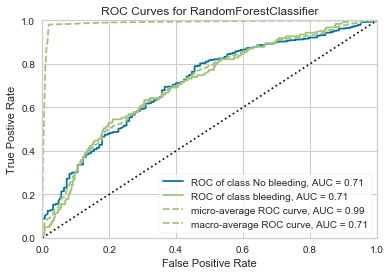

In [9]:
visualizer = ROCAUC(clf, classes=["No bleeding", "bleeding"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();

In [12]:
# visualizer = PrecisionRecallCurve(clf, classes=['no bleeding', 'bleeding'])

# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show()

c:\users\pablo\anaconda3\envs\tfg\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


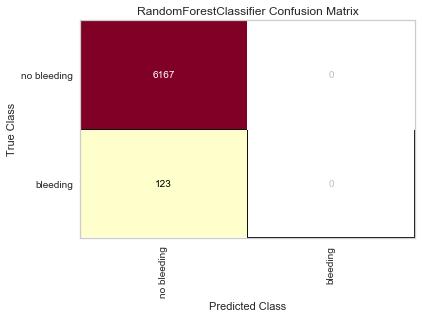

In [11]:
visualizer = ConfusionMatrix(clf, classes=['no bleeding', 'bleeding'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

c:\users\pablo\anaconda3\envs\tfg\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\pablo\anaconda3\envs\tfg\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


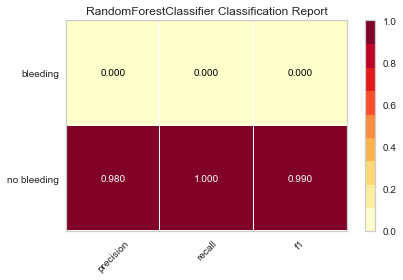

In [13]:
visualizer = ClassificationReport(clf, classes=['no bleeding', 'bleeding'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

---
# Reinfarto

In [14]:
X_train = df.loc[(df.Registro == 'BLEEMACS')|(df.Registro == 'RENAMI'), var_pred]
X_test = df.loc[(df.Registro == 'Vigo_Arritxaca'), var_pred]

y_train = df.loc[(df.Registro == 'BLEEMACS')|(df.Registro == 'RENAMI'), 'reAMIless12Dapt']
y_test = df.loc[(df.Registro == 'Vigo_Arritxaca'), 'reAMIless12Dapt']

### Random Forest

In [15]:
# cross-validation

clf = RandomForestClassifier(max_depth= 2, max_features= 1,random_state=1234)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
print(scores ,'\n\n')
print(scores.mean())

[0.66067821 0.64954305 0.69521405 0.68359788 0.67190985 0.88531469
 0.70787615 0.69405944 0.70008951 0.65845172] 


0.7006734544234544


In [16]:
clf = clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)
print(roc_auc_score(y_test, y_prob[:,1]))

0.5860469729841329


In [17]:
clf.feature_importances_

array([0.03067749, 0.00264578, 0.04318274, 0.01784822, 0.03236297,
       0.04363533, 0.03907968, 0.0358065 , 0.0319496 , 0.01031439,
       0.02519378, 0.0055197 , 0.02748096, 0.02250731, 0.05656501,
       0.03644182, 0.00879279, 0.00206603, 0.04620762, 0.03135827,
       0.02521544, 0.07130853, 0.06750876, 0.        , 0.08172653,
       0.0486731 , 0.02736415, 0.03280551, 0.02768699, 0.01226456,
       0.01112487, 0.00296822, 0.00388371, 0.03783366])

c:\users\pablo\anaconda3\envs\tfg\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


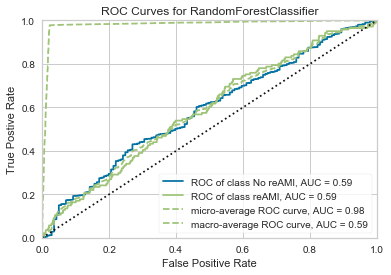

In [18]:
visualizer = ROCAUC(clf, classes=["No reAMI", "reAMI"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();

In [ ]:
# visualizer = PrecisionRecallCurve(clf, classes=['no reAMI', 'reAMI'])

# visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show()

c:\users\pablo\anaconda3\envs\tfg\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


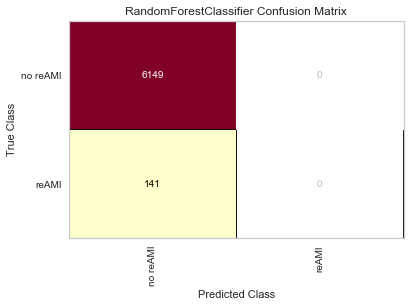

In [19]:
visualizer = ConfusionMatrix(clf, classes=['no reAMI', 'reAMI'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

c:\users\pablo\anaconda3\envs\tfg\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
c:\users\pablo\anaconda3\envs\tfg\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


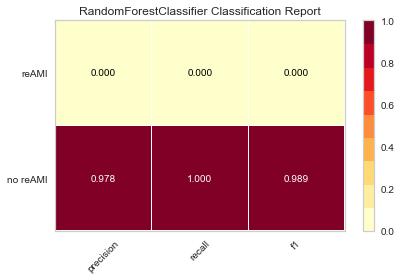

In [20]:
visualizer = ClassificationReport(clf, classes=['no reAMI', 'reAMI'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()